<font color='orange'>**Please create your own copy before starting modification**</font>

In [239]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

Dependencies: Add Your dependencies here

In [240]:
import pandas as pd

Code

<font color='red'>**Part 1**</font>

<font color='cyan'>**Dataset: The dataset represents the mood of a student to go to class depending on the weather at IIT Jodhpur. We have been accustomed to online classes so this is to give you folks a feeling of attending classes in the post COVID scenario.**</font>

A sample of the dataset is shown

In [241]:
dic = {'Time':'Morning','Temperature':'Hot','Friend_Attending':'No','Windy':'Yes','Attend':'Yes'}
df= pd.DataFrame(dic,index=[0])
df

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,No,Yes,Yes


Read the complete data from the CSV file at link: "Add Link to CSV here"



In [242]:
df = pd.read_csv("/content/Data_Decision_Trees - Sheet1.csv")
df.head()


,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,Yes,Low,No
1,Morning,Hot,Yes,High,No
2,Afternoon,Hot,Yes,Low,Yes
3,Evening,Warm,Yes,Low,Yes
4,Evening,Cool,No,Low,Yes


<font color='red'>**Part 2**</font>

Implement the same using Scikit Learn

Preprocessing

In [243]:
                        
df["Time"].value_counts()
df["Temperature"].value_counts()
print(df)

         Time Temperature Friend_Attending Windy Attend
0     Morning         Hot              Yes   Low     No
1     Morning         Hot              Yes  High     No
2   Afternoon         Hot              Yes   Low    Yes
3     Evening        Warm              Yes   Low    Yes
4     Evening        Cool               No   Low    Yes
5     Evening        Cool               No  High     No
6   Afternoon        Cool               No  High    Yes
7     Morning        Warm              Yes   Low     No
8     Morning        Cool               No   Low    Yes
9     Evening        Warm               No   Low    Yes
10    Morning        Warm               No  High    Yes
11  Afternoon        Warm              Yes  High    Yes
12  Afternoon         Hot               No   Low    Yes
13    Evening        Warm              Yes  High     No


In [244]:
enc = OrdinalEncoder(categories=[["Morning", "Afternoon", "Evening"],
                                 ["Cool", "Warm", "Hot"], 
                                 ["No", "Yes"],
                                 ["Low", "High"], 
                                 ["No", "Yes"]
                                ])

df[["Time", "Temperature", "Friend_Attending", "Windy", "Attend"]] = enc.fit_transform(df[["Time", "Temperature", "Friend_Attending", "Windy", "Attend"]])
print(df)
print(df.dtypes)

    Time  Temperature  Friend_Attending  Windy  Attend
0    0.0          2.0               1.0    0.0     0.0
1    0.0          2.0               1.0    1.0     0.0
2    1.0          2.0               1.0    0.0     1.0
3    2.0          1.0               1.0    0.0     1.0
4    2.0          0.0               0.0    0.0     1.0
5    2.0          0.0               0.0    1.0     0.0
6    1.0          0.0               0.0    1.0     1.0
7    0.0          1.0               1.0    0.0     0.0
8    0.0          0.0               0.0    0.0     1.0
9    2.0          1.0               0.0    0.0     1.0
10   0.0          1.0               0.0    1.0     1.0
11   1.0          1.0               1.0    1.0     1.0
12   1.0          2.0               0.0    0.0     1.0
13   2.0          1.0               1.0    1.0     0.0
Time                float64
Temperature         float64
Friend_Attending    float64
Windy               float64
Attend              float64
dtype: object


Shuffle the data frame

In [245]:
from sklearn.utils import shuffle
df = shuffle(df)
print(df)

    Time  Temperature  Friend_Attending  Windy  Attend
3    2.0          1.0               1.0    0.0     1.0
8    0.0          0.0               0.0    0.0     1.0
9    2.0          1.0               0.0    0.0     1.0
0    0.0          2.0               1.0    0.0     0.0
2    1.0          2.0               1.0    0.0     1.0
12   1.0          2.0               0.0    0.0     1.0
13   2.0          1.0               1.0    1.0     0.0
1    0.0          2.0               1.0    1.0     0.0
7    0.0          1.0               1.0    0.0     0.0
6    1.0          0.0               0.0    1.0     1.0
11   1.0          1.0               1.0    1.0     1.0
10   0.0          1.0               0.0    1.0     1.0
4    2.0          0.0               0.0    0.0     1.0
5    2.0          0.0               0.0    1.0     0.0


Take two for testing and rest for training

In [246]:
# df.shape
input = df[["Time", "Temperature", "Friend_Attending", "Windy"]]
target = df['Attend']
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.1, random_state=0)

Display Training

In [247]:
print(X_train)
print("\n")
print(y_train)


    Time  Temperature  Friend_Attending  Windy
2    1.0          2.0               1.0    0.0
10   0.0          1.0               0.0    1.0
9    2.0          1.0               0.0    0.0
5    2.0          0.0               0.0    1.0
6    1.0          0.0               0.0    1.0
8    0.0          0.0               0.0    0.0
1    0.0          2.0               1.0    1.0
11   1.0          1.0               1.0    1.0
0    0.0          2.0               1.0    0.0
3    2.0          1.0               1.0    0.0
12   1.0          2.0               0.0    0.0
4    2.0          0.0               0.0    0.0


2     1.0
10    1.0
9     1.0
5     0.0
6     1.0
8     1.0
1     0.0
11    1.0
0     0.0
3     1.0
12    1.0
4     1.0
Name: Attend, dtype: float64


Display Testing

In [248]:
print(X_test)
print("\n")
print(y_test)

    Time  Temperature  Friend_Attending  Windy
7    0.0          1.0               1.0    0.0
13   2.0          1.0               1.0    1.0


7     0.0
13    0.0
Name: Attend, dtype: float64


Given the follwing data construct a decision tree using Entropy

In [249]:
model_1 = tree.DecisionTreeClassifier(criterion='entropy')
model_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Fit the classifier using Gini Impurity

In [250]:
model_2 = tree.DecisionTreeClassifier(criterion='gini')
model_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print the cross validation score with folds = 5

In [251]:
cv_score_entropy = cross_val_score(model_1, X_train, y_train, cv=5)
cv_score_gini = cross_val_score(model_2, X_train,y_train, cv=5)
print(cv_score_entropy)
print(cv_score_gini )

[0.66666667 0.33333333 1.         1.         0.5       ]
[0.66666667 0.66666667 1.         1.         0.5       ]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Print the depth of the decison Tree

In [252]:
depth_1 = model_1.get_depth()
depth_2 = model_2.get_depth()
print(depth_1)
print(depth_2)

4
3


Print the number of leaves in the decision Tree

In [253]:
leaves_1 = model_1.get_n_leaves()
leaves_2 = model_2.get_n_leaves()
print(leaves_1)
print(leaves_2)

6
5


Return the index of the leaf that each sample is predicted as.



In [254]:
model_1.apply(input)

array([10,  2, 10,  3, 10, 10, 10,  3,  3,  8, 10,  2,  6,  9])

In [255]:
model_2.apply(input)

array([5, 2, 5, 3, 5, 5, 8, 3, 2, 7, 7, 2, 5, 8])

Print the decision path

In [256]:
print(X_test)
model_1.decision_path(X_test).toarray()

    Time  Temperature  Friend_Attending  Windy
7    0.0          1.0               1.0    0.0
13   2.0          1.0               1.0    1.0


array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

In [257]:
model_2.decision_path(X_test).toarray()

array([[1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 1]])

Print the gini impurity of each feature

In [258]:
result = model_2.feature_importances_

print("Gini Impurity of each features of Decision Tree Classifier with Gini")
result_ii = model_2.feature_importances_
for i,v in enumerate(result):
	print('Feature: %0d, Score: %.5f' % (i,v))

Gini Impurity of each features of Decision Tree Classifier with Gini
Feature: 0, Score: 0.46296
Feature: 1, Score: 0.44444
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.09259


Training Accuracy

In [259]:
from sklearn.metrics import accuracy_score 
# for model_1
y_pred = model_1.predict(X_train)
score = accuracy_score(y_train, y_pred)
print(score)

1.0


In [260]:
from sklearn.metrics import accuracy_score 
# for model_2
y_pred = model_2.predict(X_train)
score = accuracy_score(y_train, y_pred)
print(score)

1.0


Testing accuracy

In [261]:
# for model_1
y_pred = model_1.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.5


In [262]:
# for model_2
y_pred = model_2.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.5


Map the query: [Time: Morning, Temperature: Warm, Friend_Attending: No, 'Wind': Low] to the correct numerical value as the training and the predict the output.

In [263]:
prediction = model_1.predict([[0,1,0,0]])
if prediction == 0:
  print("No")
elif prediction == 1:
  print("Yes")

Yes


<font color='red'>**Part 3**</font>

Plot the decision tree

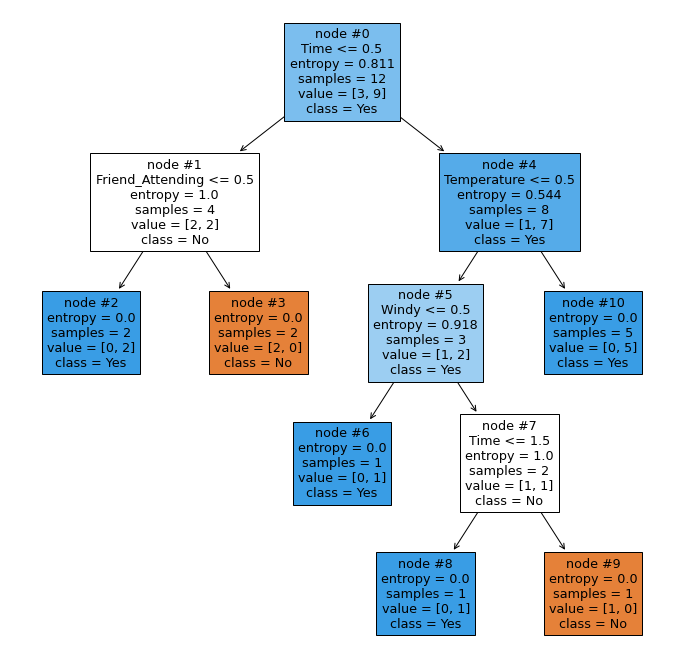

In [264]:
plt.figure(figsize=(12,12))
tree.plot_tree(model_1, feature_names=["Time", "Temperature", "Friend_Attending", "Windy"], class_names= ["No", "Yes"], filled=True, node_ids= True)
plt.show()

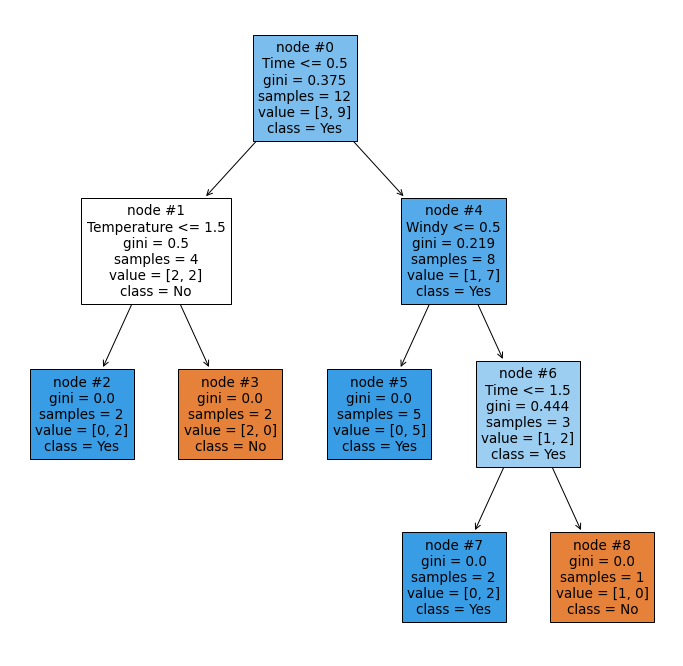

In [265]:
plt.figure(figsize=(12,12))
tree.plot_tree(model_2, feature_names=["Time", "Temperature", "Friend_Attending", "Windy"], class_names= ["No", "Yes"], filled=True, node_ids= True)
plt.show()

Plot the decision surface

(-1.0, 2.9600000000000035, -1.0, 2.9600000000000035)

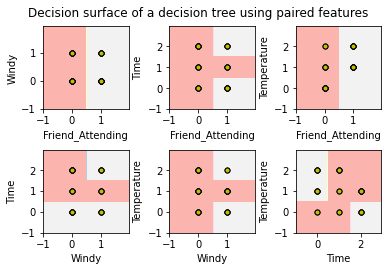

In [266]:
X = ['Friend_Attending','Windy','Time','Temperature']
Y = ['Attend']
n_classes = 2
plot_colors = "ry"
plot_step = 0.04

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    x = input.loc[:,[X[pair[0]],X[pair[1]]]]
    y = target
   
    # print(x)
    # print(y)

    
    
    clf = model_1.fit(x, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
   
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap="Pastel1_r")

    plt.xlabel(X[pair[0]])
    plt.ylabel(X[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = input.where(y == i)
        plt.scatter(x.iloc[list(idx.index.values), 0], x.iloc[list(idx.index.values), 1], c=color,
                    cmap='Greys', edgecolor='black', s=25)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")



<font color='magenta'>**Part 04: Not Compulsory**</font>

Advanced: Can you implement the partitioning of the decision tree using the following algorithm

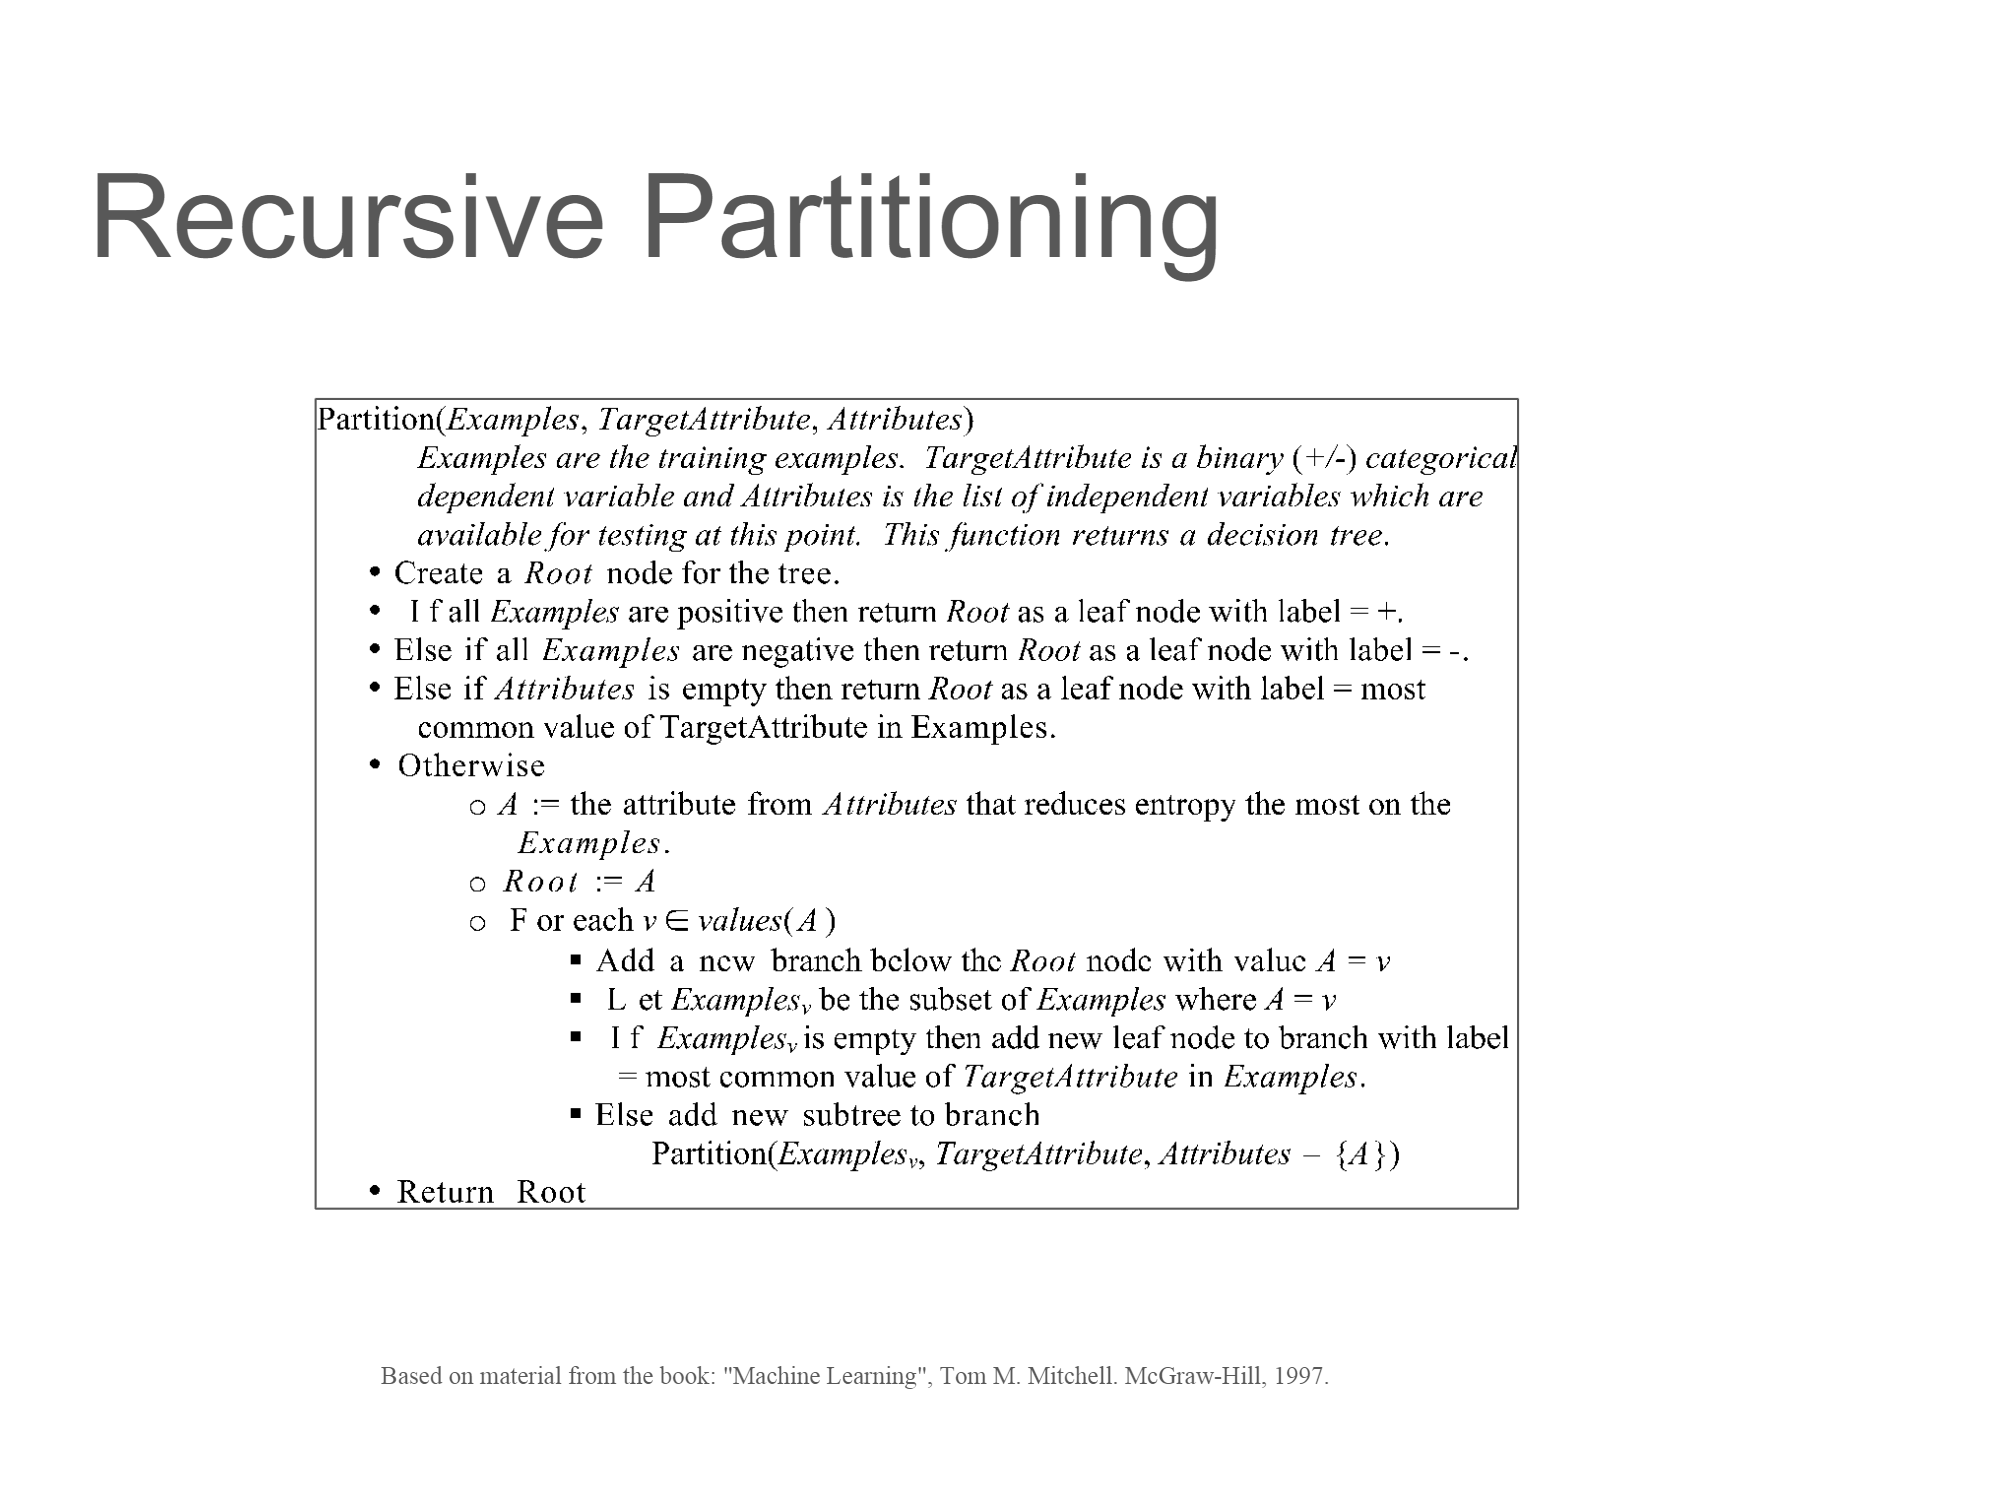

Part 5: Building Decision Trees when the data is of a continuous nature

In the previous case the nodes were broken based on entropy/gini impurity. In the case of regression the mean sqaured error is the decsion parameter for splitting the nodes. The following dataset contains continuous data and we need to use decision trees with regression.

Read the dataset

In [267]:
deaths = pd.read_csv("/content/death (1).csv")

Preprocess the dataset to remove all the rows with empty column values

In [268]:
deaths.head()
deaths.shape


(3141, 11)

In [269]:
deaths.replace('**', np.nan, inplace=True)
deaths.replace('*',np.nan, inplace=True)
deaths.dropna(axis=0,inplace=True)
deaths.shape
deaths["Average Deaths per Year"] = deaths["Average Deaths per Year"].str.replace(",",""). astype(float)
print(deaths.shape)
print(deaths.dtypes)

(2694, 11)
County                                           object
FIPS                                              int64
Met Objective of 45.5? (1)                       object
Age-Adjusted Death Rate                          object
Lower 95% Confidence Interval for Death Rate     object
Upper 95% Confidence Interval for Death Rate     object
Average Deaths per Year                         float64
Recent Trend (2)                                 object
Recent 5-Year Trend (2) in Death Rates           object
Lower 95% Confidence Interval for Trend          object
Upper 95% Confidence Interval for Trend          object
dtype: object


In [270]:
for column in deaths.columns:
  if deaths[column].dtype==object and column!="County" and column !="Met Objective of 45.5? (1)" and column !="Recent Trend (2)"	:
    deaths[column]= deaths[column].astype(float)
  print(deaths[column].dtype)



object
int64
object
float64
float64
float64
float64
object
float64
float64
float64


In [271]:
deaths.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8
5,"Union County, Florida",12125,No,113.5,89.9,141.4,19.0,falling,-2.2,-4.3,0.0


Convert Categorical Values to numerical

In [272]:
print(deaths["Recent Trend (2)"].value_counts())
print(deaths["Met Objective of 45.5? (1)"].value_counts())
print(deaths["County"].value_counts())


stable     1796
falling     867
rising       31
Name: Recent Trend (2), dtype: int64
No     1917
Yes     777
Name: Met Objective of 45.5? (1), dtype: int64
Bedford County, Tennessee        1
Tattnall County, Georgia         1
Yavapai County, Arizona          1
San Patricio County, Texas       1
Pike County, Arkansas            1
                                ..
Tolland County, Connecticut      1
Wayne County, New York           1
Hunterdon County, New Jersey     1
Lenoir County, North Carolina    1
DeKalb County, Georgia           1
Name: County, Length: 2694, dtype: int64


In [273]:
deaths.head()


,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8
5,"Union County, Florida",12125,No,113.5,89.9,141.4,19.0,falling,-2.2,-4.3,0.0


In [274]:
encod = OrdinalEncoder()
deaths[["Met Objective of 45.5? (1)","Recent Trend (2)"]]= encod.fit_transform(deaths[["Met Objective of 45.5? (1)","Recent Trend (2)"]])



In [275]:
deaths.dtypes

County                                           object
FIPS                                              int64
Met Objective of 45.5? (1)                      float64
Age-Adjusted Death Rate                         float64
Lower 95% Confidence Interval for Death Rate    float64
Upper 95% Confidence Interval for Death Rate    float64
Average Deaths per Year                         float64
Recent Trend (2)                                float64
Recent 5-Year Trend (2) in Death Rates          float64
Lower 95% Confidence Interval for Trend         float64
Upper 95% Confidence Interval for Trend         float64
dtype: object

In [276]:
deaths.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,0.0,46.0,45.9,46.1,157376.0,0.0,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,0.0,125.6,108.9,144.2,43.0,2.0,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,0.0,125.3,100.2,155.1,18.0,2.0,1.7,0.0,3.4
4,"Owsley County, Kentucky",21189,0.0,118.5,83.1,165.5,8.0,2.0,2.2,-0.4,4.8
5,"Union County, Florida",12125,0.0,113.5,89.9,141.4,19.0,0.0,-2.2,-4.3,0.0


Split the dataset into train and test(Based on split size)

In [277]:
print(deaths.shape)
deaths = deaths.drop("County", axis="columns")
print(deaths.shape)
print(deaths.head())
deaths = shuffle(deaths)

input_deaths = deaths.drop("Upper 95% Confidence Interval for Trend",
  axis="columns")
target_deaths = deaths["Upper 95% Confidence Interval for Trend"]
X_train, X_test, y_train, y_test = train_test_split(input_deaths, target_deaths, test_size=0.2, random_state=0)

(2694, 11)
(2694, 10)
    FIPS  ...  Upper 95% Confidence Interval for Trend
0      0  ...                                     -2.2
1  21193  ...                                      1.6
2  21197  ...                                      3.4
4  21189  ...                                      4.8
5  12125  ...                                      0.0

[5 rows x 10 columns]


In [278]:
print(X_test)
print(X_train)


       FIPS  ...  Lower 95% Confidence Interval for Trend
2652  55061  ...                                     -1.7
1480   1093  ...                                     -8.6
478   18111  ...                                     -1.4
511   18167  ...                                     -1.2
1312  48395  ...                                     -2.7
...     ...  ...                                      ...
1120  29059  ...                                     -1.7
2213  31035  ...                                     -2.5
237    5089  ...                                     -2.4
2185  25017  ...                                     -3.0
636   18079  ...                                     -2.1

[539 rows x 9 columns]
       FIPS  ...  Lower 95% Confidence Interval for Trend
303    5047  ...                                     -2.4
2245  55009  ...                                     -1.0
352   51730  ...                                     -2.7
2441  48107  ...                                

Perform the decision tree regression

In [279]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [280]:
#Cross validation
cross_val_score(regressor, X_train, y_train, cv=10)

array([ 0.79091033,  0.92000989,  0.95840607,  0.78934916,  0.95407052,
       -2.23615867,  0.76945028,  0.88487892,  0.6124161 , -0.10463619])

Predict on test dataset

In [281]:
y_pred= regressor.predict(X_test)
print(y_pred)

[ 1.3 -2.7  2.   0.3  0.3  1.2  2.5  4.5 -1.2  3.1  4.  -2.   2.3  1.5
 -0.2 -0.3  1.1 -0.2  0.5  3.2  1.2 -0.6  1.   0.3  1.6  1.1  1.8  2.
  1.4  1.4 -0.2 -0.7 -3.3  0.3  0.5 20.6  0.3  1.1  0.2  0.7 -0.2  0.2
  0.5  3.1  1.9 -0.4  1.   0.5  0.1  2.9 -0.1  1.5  1.7  2.6 -1.2 -1.
 -2.3  1.8 -0.7  0.7  0.6  1.2  2.5 -0.2  0.4  1.2  1.8  0.2  0.5  0.6
  0.   0.4 -0.1  1.5  0.9  2.6  2.7 -0.9 -2.3  0.6 -0.2  0.2 -0.3  1.3
  0.3  2.7  1.6 -1.4  1.3  0.5  0.2  0.8  0.5 -0.3 -1.3  1.   2.7  0.6
  1.3  0.5  1.9 -3.7  2.   1.4  0.9  0.2  2.2  1.5  0.8  3.1  0.9  2.1
  0.6 -0.9 -0.1 -1.1  2.7 -0.2  4.1  1.8  3.3  0.7  0.7  1.2  1.2  0.1
 -0.4  0.3  0.  -1.5 -0.9  0.7  1.4  1.4 -0.7  1.2  1.5  0.8  2.5  1.
 -0.2  0.7  0.6  0.7  1.5 -0.2 -1.6  0.5  0.6  0.5  1.5  2.6  1.  -1.7
  1.5 -0.6  1.9 -0.6 -1.3 -0.1 -1.1  0.2 -0.2 -2.9  2.1  2.9 -1.9  3.1
 -2.5 -0.3  3.2 -0.7  3.8 -0.5 -1.2  0.2 -0.7  0.3  1.8  3.1 -2.   2.2
 -0.6  0.6  1.4  0.7  0.8  2.1  0.1  2.1  2.5  0.8  1.6  1.7  2.2 -0.4
  1.4  0.

Calculate Squared Error between predicted and real values

In [282]:
 from sklearn.metrics import mean_squared_error
 mean_squared_error(y_test, y_pred, multioutput='uniform_average')

0.7735621521335807

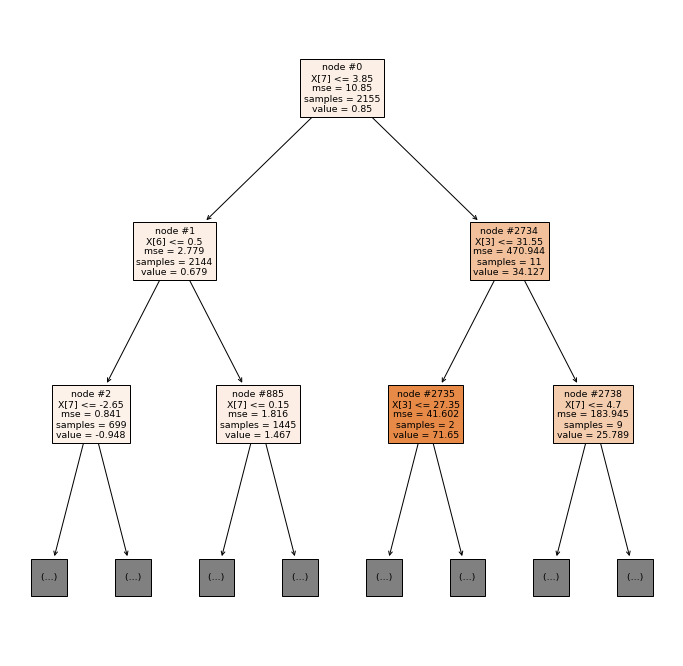

In [283]:
# plotted decision tree
plt.figure(figsize=(12,12))
tree.plot_tree(regressor, filled=True, node_ids= True, max_depth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


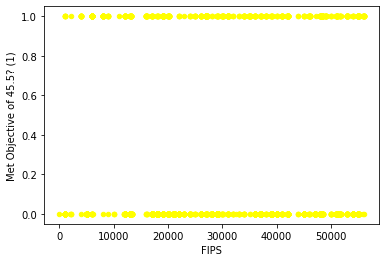

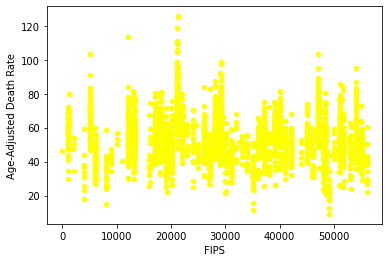

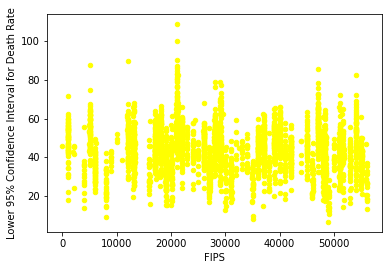

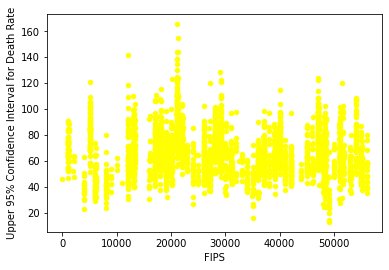

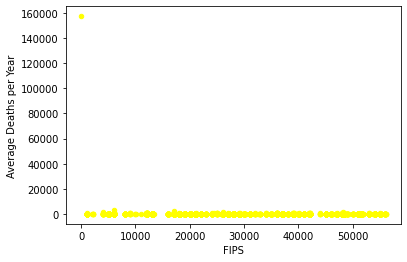

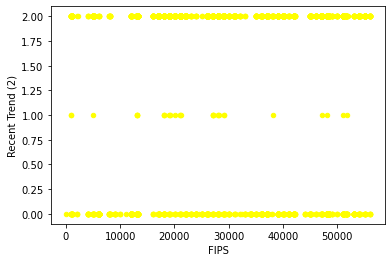

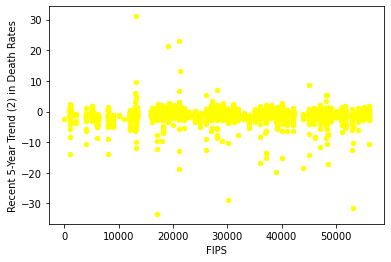

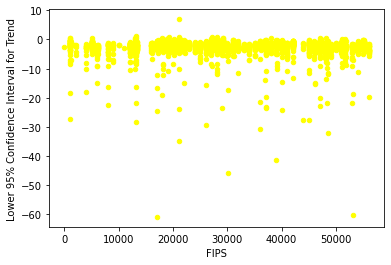

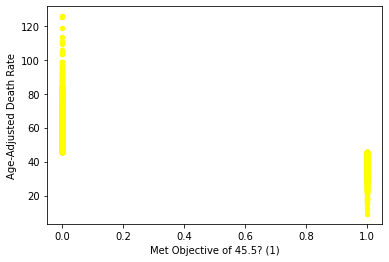

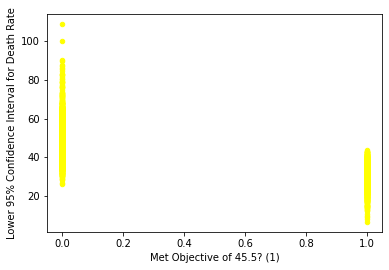

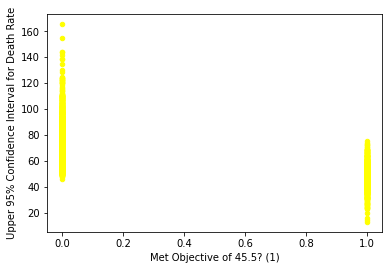

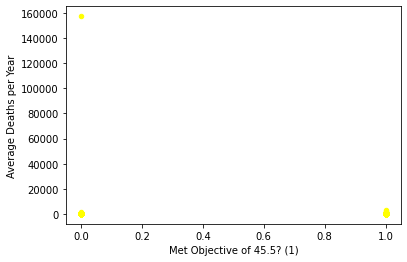

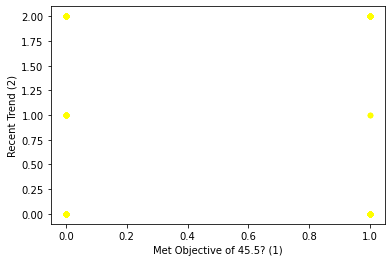

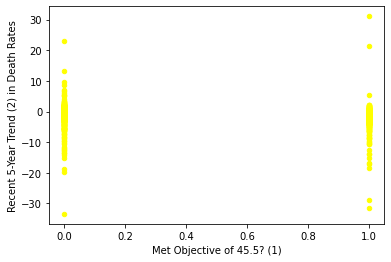

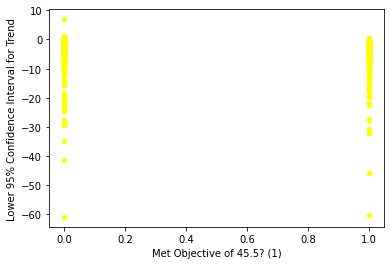

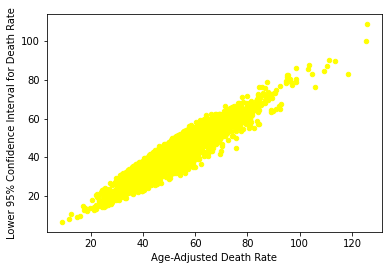

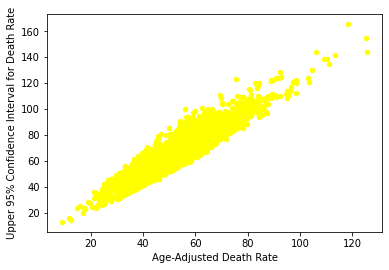

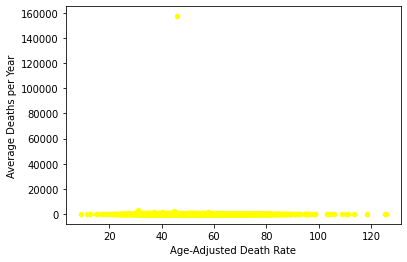

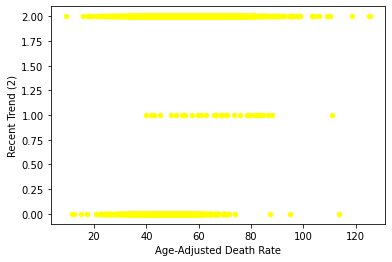

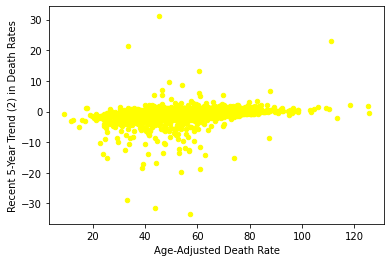

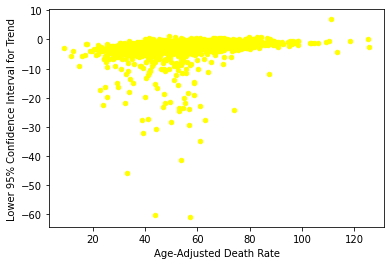

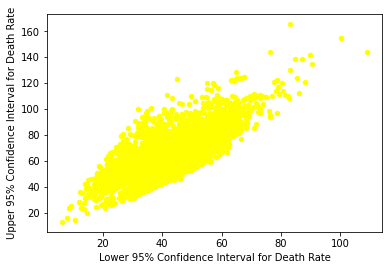

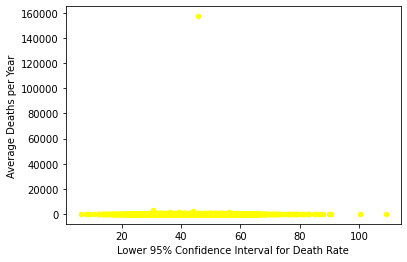

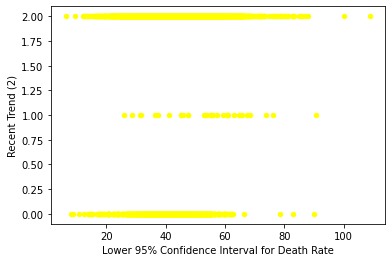

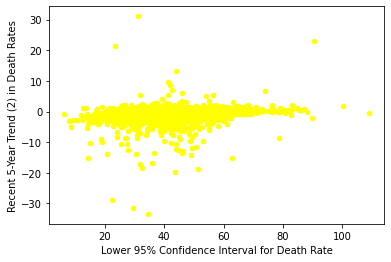

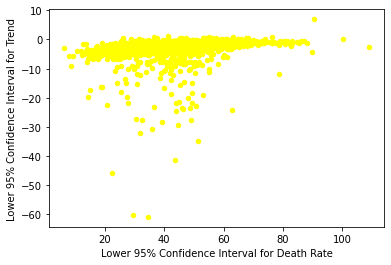

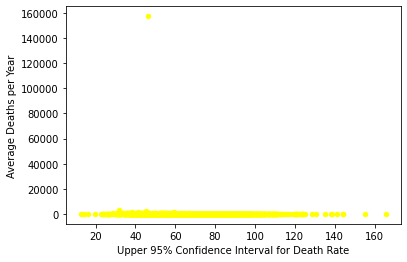

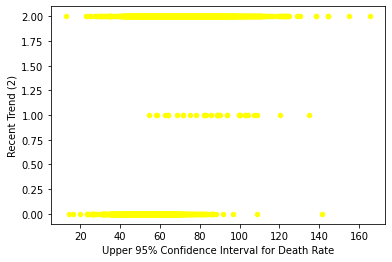

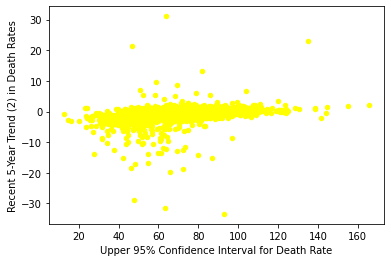

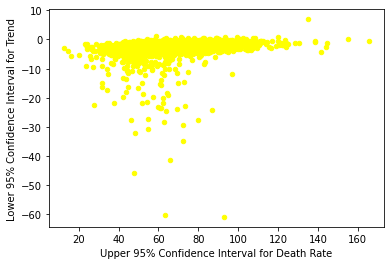

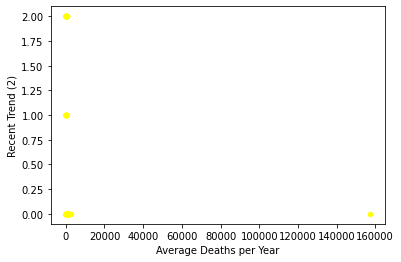

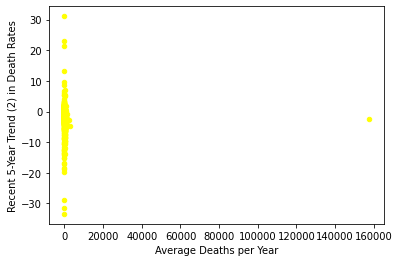

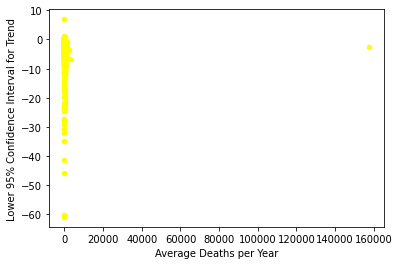

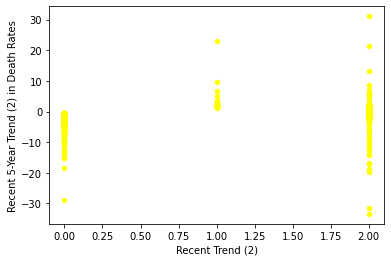

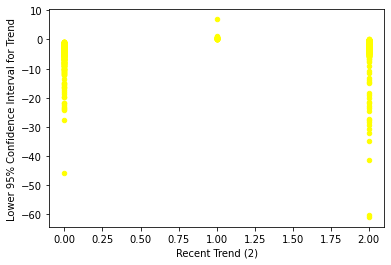

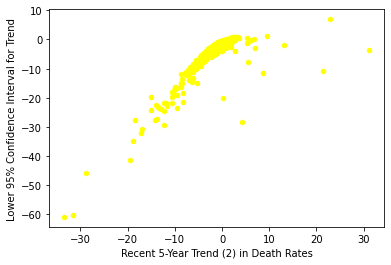

In [284]:

X = deaths.columns.tolist()
for i in range(0,8):
  for j in range(i+1,9):
    count+=1
    ax = deaths.plot.scatter(x=X[i],y=X[j],c='Yellow')




<font color='green'>**References**</font>



*   [Ref1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*   [Ref2](https://pbpython.com/categorical-encoding.html)


*   [Ref3](https://mljar.com/blog/visualize-decision-tree/)


*   [Ref4](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)


*   [Ref5](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

*   [Ref6](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)